In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("hope_final.csv")
df.head()

Unnamed: 0                   Company Name  \
0           0                         Google   
1           1               Procter & Gamble   
2           2              Andaze Japan Ltd.   
3           3                         XIRCLS   
4           4  Finarkein Analytics Pvt. Ltd.   

                                           Job Title  \
0  Pre-Doctoral Researcher, University Graduate (...   
1           .Net C# Developer for a Japanese company   
2                                Data Scientist - IT   
3                          Machine Learning Engineer   
4                          Machine Learning Engineer   

                                     Job Description  Years of Experience  \
0    To start the application process  you will n...                  2.0   
1    About Andaze Japan    Our main business is c...                  3.0   
2    Job Location        Mumbai            Job De...                  2.0   
3    This job is for final year students  fresher...                  2.0   
4    We are looking for a passionate Machine Lear...                  5.0   

    Location   Job Type Level             Categories  python  ...  sql  nosql  \
0  Bangalore  Full time   Mid  Statiticians/Research       1  ...    0      0   
1     Remote  Full time   Mid              Developer       0  ...    0      0   
2     Mumbai  Full time   Mid         Data Scientist       0  ...    0      0   
3     Mumbai  Full time   Mid          AI Specialist       1  ...    0      0   
4       Pune  Full time   Mid          AI Specialist       1  ...    0      0   

   mongodb  scala  ml  ai  nlp  deep_learning   ratings  avg_salary  
0        0      0   1   1    0              0  4.500000        4.00  
1        0      0   1   1    0              0  4.221543       21.50  
2        0      0   1   1    0              0  4.200000        0.96  
3        0      0   1   1    0              0  3.883892       11.00  
4        0      1   1   1    0              1  4.056668        2.00  

[5 rows x 32 columns]

In [3]:
df.columns

Index(['Unnamed: 0', 'Company Name', 'Job Title', 'Job Description',
       'Years of Experience', 'Location', 'Job Type', 'Level', 'Categories',
       'python', 'R', 'spark', 'aws', 'excel', 'tableau', 'power_bi', 'hadoop',
       'azure', 'cloud', 'big_data', 'java', 'javascript', 'sql', 'nosql',
       'mongodb', 'scala', 'ml', 'ai', 'nlp', 'deep_learning', 'ratings',
       'avg_salary'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=4061, step=1)

In [5]:
df.shape

(4061, 32)

In [7]:
df.size

129952

In [8]:
df.dtypes

Unnamed: 0               int64
Company Name            object
Job Title               object
Job Description         object
Years of Experience    float64
Location                object
Job Type                object
Level                   object
Categories              object
python                   int64
R                        int64
spark                    int64
aws                      int64
excel                    int64
tableau                  int64
power_bi                 int64
hadoop                   int64
azure                    int64
cloud                    int64
big_data                 int64
java                     int64
javascript               int64
sql                      int64
nosql                    int64
mongodb                  int64
scala                    int64
ml                       int64
ai                       int64
nlp                      int64
deep_learning            int64
ratings                float64
avg_salary             float64
dtype: o

In [10]:
df.isna().sum()

Unnamed: 0             0
Company Name           0
Job Title              0
Job Description        0
Years of Experience    0
Location               0
Job Type               0
Level                  0
Categories             0
python                 0
R                      0
spark                  0
aws                    0
excel                  0
tableau                0
power_bi               0
hadoop                 0
azure                  0
cloud                  0
big_data               0
java                   0
javascript             0
sql                    0
nosql                  0
mongodb                0
scala                  0
ml                     0
ai                     0
nlp                    0
deep_learning          0
ratings                0
avg_salary             0
dtype: int64

In [16]:
df['Categories'].unique()

array(['Statiticians/Research', 'Developer', 'Data Scientist',
       'AI Specialist', 'Data Analyst', 'Data Engineer',
       'Business Analytics', 'Consultant', 'Architect',
       'Big Data Analyst', 'Data Base Management'], dtype=object)

In [18]:
!pip3 install wordcloud

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import ImageColorGenerator

In [22]:
Stopwords = set(STOPWORDS)
text = ' '.join(df['Job Title'])
wordcloud = WordCloud(width=1400, height=800, margin=0, background_color='snow',stopwords=Stopwords).generate(text)

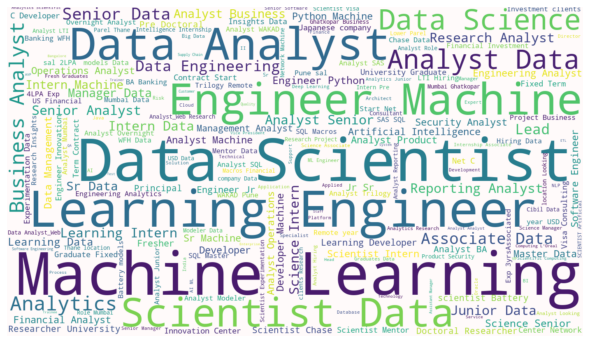

In [23]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(y=1000)
plt.tight_layout(pad = 0)
plt.show()

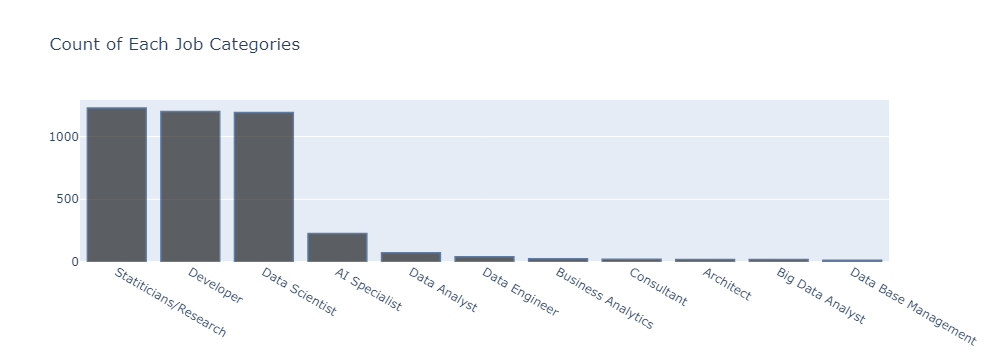

In [7]:
import plotly.graph_objects as go
fig = go.Figure([
    go.Bar(x=df['Categories'].unique(), y=df['Categories'].value_counts())
])
fig.update_layout(title="Count of Each Job Categories")
fig.update_traces(marker_color='black', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

In [ ]:
Based on the above graph, we can clearly notice that Statisticians/Researchers followed by Developer 
and Data Scientist is the three major job roles which have high demand in todays market according to the data scraped by us.

In [5]:
df['Location'].replace('Bengaluru', 'Bangalore', inplace = True)
df['Location'].replace('Gurugram', 'Gurgaon', inplace = True)
df['Location'].replace('Hyderābād', 'Hyderabad', inplace = True)
df['Location'].replace('India', 'Remote', inplace = True)
df['Location'].replace('Maharashtra	', 'Mumbai	', inplace = True)

In [1]:
import matplotlib.pyplot as plt
df_groups = df.groupby('Location').size()
df_groups.plot(kind='pie', title='Availability of Jobs in different places',
               ylabel='Count', xlabel='Name of the place', figsize=(90, 6))
plt.xticks(rotation=0)

NameError: name 'df' is not defined

In [ ]:
Based on the above pie chart, we can clearly see that there are large number of job opening
related to Data Jobs in the city Bangalore followed by Mumbai

(array([0, 1, 2]),
 [Text(0, 0, 'Full time'), Text(1, 0, 'Night Shift'), Text(2, 0, 'Part time')])

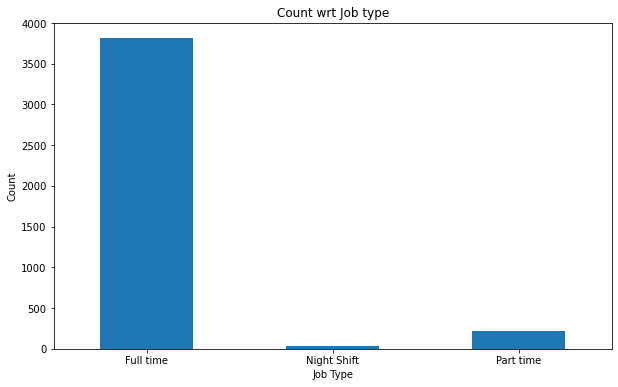

In [38]:
import matplotlib.pyplot as plt
df_groups = df.groupby('Job Type').size()
df_groups.plot(kind='bar', title='Count wrt Job type',
               ylabel='Count', xlabel='Job Type', figsize=(10, 6))
plt.xticks(rotation=0)

In [ ]:
From the data web scraped by us, we notice that opening for Full type job is more compared to Night-Shift or Part Time

(array([0, 1, 2]),
 [Text(0, 0, 'Advance'), Text(1, 0, 'Entry'), Text(2, 0, 'Mid')])

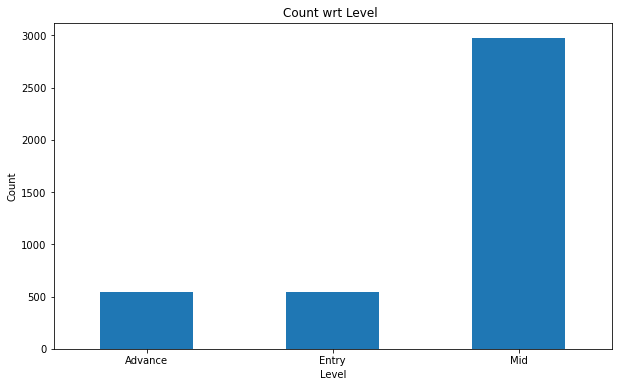

In [39]:
import matplotlib.pyplot as plt
df_groups = df.groupby('Level').size()
df_groups.plot(kind='bar', title='Count wrt Level ',
               ylabel='Count', xlabel='Level', figsize=(10, 6))
plt.xticks(rotation=0)

In [ ]:
From the data web scraped by us, we notice that opening for Mid Level position  is more compared to Advance or Entry Level

(array([0, 1, 2]),
 [Text(0, 0, 'Full time'), Text(1, 0, 'Night Shift'), Text(2, 0, 'Part time')])

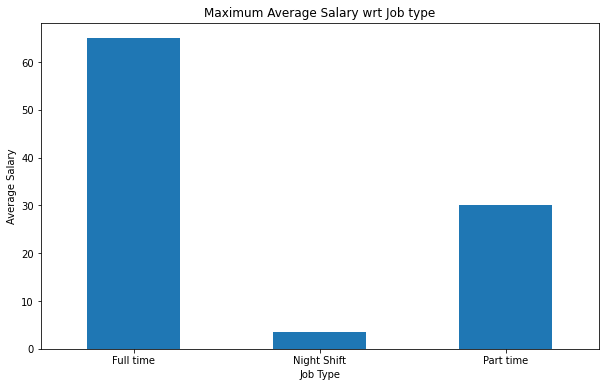

In [45]:
import matplotlib.pyplot as plt
df_groups = df.groupby('Job Type')['avg_salary'].max()
df_groups.plot(kind='bar', title='Maximum Average Salary wrt Job type',
               ylabel='Average Salary', xlabel='Job Type', figsize=(10, 6))
plt.xticks(rotation=0)

In [ ]:
From the above graph , we notice that full time workers earns around on an average a maximum of more than 60L per annum.

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

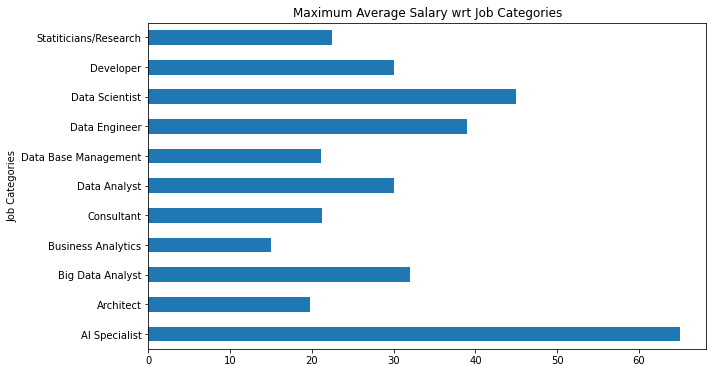

In [48]:
import matplotlib.pyplot as plt
df_groups = df.groupby('Categories')['avg_salary'].max()
df_groups.plot(kind='barh', title='Maximum Average Salary wrt Job Categories',
               ylabel='Average Salary', xlabel='Job Categories', figsize=(10, 6))
plt.xticks(rotation=0)

In [ ]:
From the above graph we can clearly notice that AI specialist earns more than average salary any other job role.

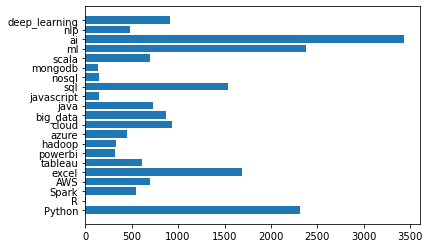

In [93]:
dict = {"Python" : df['python'].sum()
                  ,"R" :df['R'].sum()
                  ,"Spark" :df['spark'].sum()
                  ,"AWS" : df['aws'].sum()

,"excel" : df['excel'].sum()

,"tableau" : df['tableau'].sum()

,"powerbi" : df['power_bi'].sum()

,"hadoop" : df['hadoop'].sum()

,"azure" : df['azure'].sum()

,"cloud" : df['cloud'].sum()

,"big_data" : df['big_data'].sum()

,"java": df['java'].sum()

,"javascript": df['javascript'].sum()

,"sql": df['sql'].sum()

,"nosql": df['nosql'].sum()

,"mongodb": df['mongodb'].sum()

,"scala": df['scala'].sum()

,"ml": df['ml'].sum()

,"ai": df['ai'].sum()

,"nlp":df['nlp'].sum()

,"deep_learning":df['deep_learning'].sum()}


import matplotlib.pyplot as plt


names = list(dict.keys())
values = list(dict.values())

plt.barh(range(len(dict)), values, tick_label=names)
plt.show()



In [ ]:
From the graph we can notice that most of the companies demand for sqills related to AI,
which actually can be related with the conclusion we made in above graph which says that AI specialist more than anyone else
                     
                     
                    

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

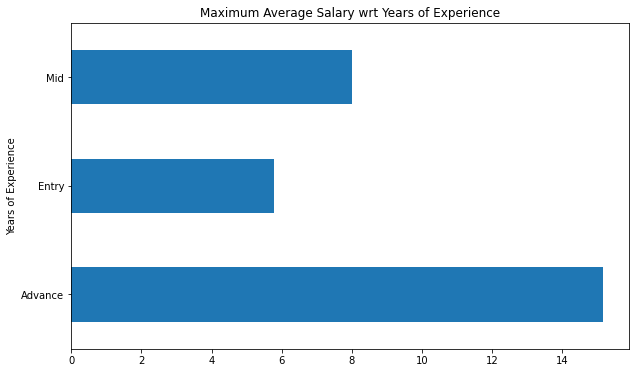

In [119]:
import matplotlib.pyplot as plt
df_groups = df.groupby('Level')['avg_salary'].median()
df_groups.plot(kind='barh', title='Maximum Average Salary wrt Years of Experience',
               ylabel='Average Salary', xlabel='Years of Experience', figsize=(10, 6))
plt.xticks(rotation=0)

In [ ]:
 From the graph,we can notice that it's ofcourse the advanced level experencied person
who earns avaerage salary more than the other level.

In [94]:
df.groupby('Location')["ratings"].mean().reset_index()

Location   ratings
0            Ahmedabad  3.888889
1            Bangalore  4.101891
2            Bengaluru  3.862275
3               Bhopal  3.900000
4         Bhubaneshwar  3.766667
5              Calicut  3.720000
6            Cannanore  3.950000
7           Chandigarh  3.950000
8              Chennai  3.916699
9           Coimbatore  3.966667
10               Delhi  4.033766
11           Ernakulam  3.875000
12         Gandhinagar  3.900000
13             Gurgaon  3.951587
14            Gurugram  3.840000
15               Hosur  3.900000
16           Hyderabad  3.813235
17           Hyderābād  3.906893
18               India  4.163750
19              Indore  3.750000
20              Jaipur  3.850000
21              Kerala  3.400000
22               Kochi  3.857143
23             Kolkata  3.946667
24        Kālkāji Devi  3.557246
25             Lucknow  3.736667
26            Ludhiana  4.200000
27         Maharashtra  3.800000
28              Mohali  4.234471
29              Mumbai  3.915836
30              Mysore  3.900000
31              Nashik  4.290323
32           New Delhi  3.970781
33               Noida  3.818272
34           Pitampura  4.100000
35                Pune  4.066582
36              Remote  4.006006
37        Secunderabad  3.900000
38           Telangana  3.840000
39         Temporarily  4.300000
40               Thane  3.550000
41  Thiruvananthapuram  3.743902
42   Tiruchchirappalli  3.750000
43             Udaipur  3.900000
44            Vadodara  4.151429
45             Vellore  3.850000
46          Vijayawada  4.100000
47       Visakhapatnam  3.500000

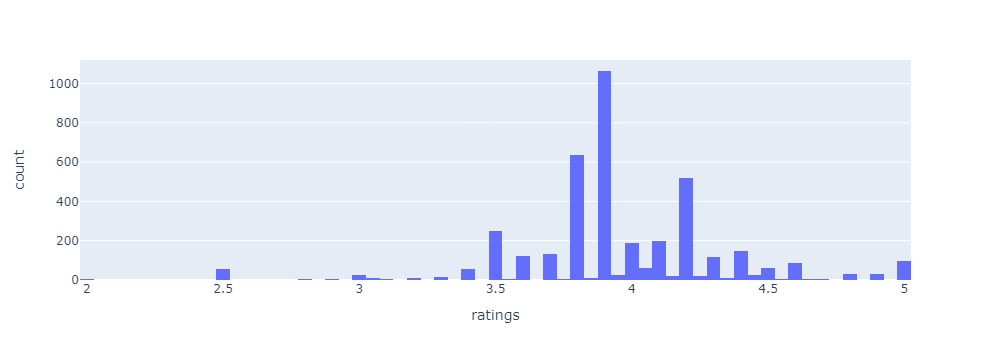

In [122]:
import plotly.express as px
fig = px.histogram(df, x="ratings")
fig

In [ ]:
The above graph of ratings grouped by city and took a mean, which results 
that there are 1064 companies which have a mean rating between 3.875 and 3,9249

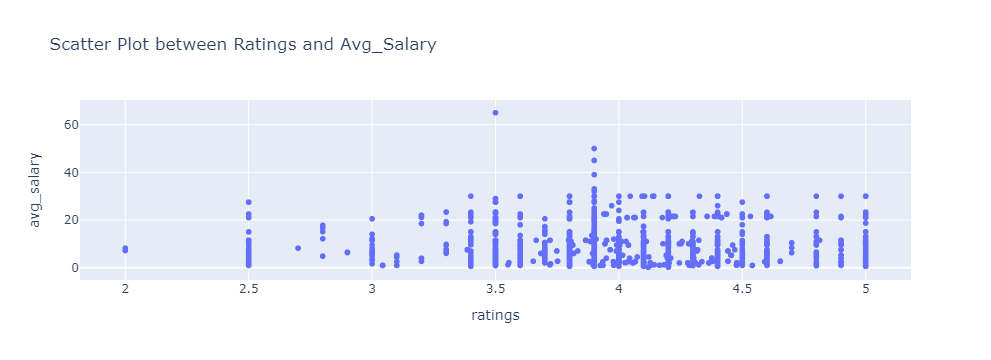

In [125]:
x= df['ratings']
y= df['avg_salary']

import plotly.express as px
fig = px.scatter(df,x ="ratings",y= "avg_salary" ,title="Scatter Plot between Ratings and Avg_Salary ")
fig.show()

In [128]:
We notice from the above scatter plot that, there are companies which pays an average salary of 
65LPA which have rating as 3.5 and company with rating  5 still has an average salary as 30LPA, 
so company with good rating doesn't mean they pay more than company with bad rating

In [102]:
df.corr()

Unnamed: 0  Years of Experience    python         R  \
Unnamed: 0             1.000000             0.189090 -0.155896  0.032446   
Years of Experience    0.189090             1.000000 -0.004867 -0.014520   
python                -0.155896            -0.004867  1.000000 -0.031364   
R                      0.032446            -0.014520 -0.031364  1.000000   
spark                  0.239001             0.139798  0.208886 -0.015193   
aws                    0.150388             0.092677  0.119745 -0.017600   
excel                  0.263295             0.054918 -0.103380 -0.006351   
tableau                0.131733             0.023573  0.174196  0.001772   
power_bi               0.152220             0.066704 -0.116274 -0.011269   
hadoop                 0.210984             0.064405  0.153701  0.011921   
azure                  0.090026             0.119369  0.124556  0.007030   
cloud                  0.146378             0.090979  0.089051  0.039915   
big_data               0.187485             0.131851  0.103810  0.042336   
java                   0.005778             0.111313  0.183536 -0.018008   
javascript             0.131217             0.036353  0.006889 -0.007481   
sql                    0.239189             0.063337  0.204576  0.035954   
nosql                  0.105991             0.072030  0.086605  0.096250   
mongodb               -0.061155             0.005236  0.046780 -0.007269   
scala                  0.178006             0.156231  0.134544 -0.017570   
ml                    -0.199779            -0.012758  0.518252 -0.032776   
ai                     0.107322             0.045016  0.080002 -0.019011   
nlp                    0.019832            -0.019307  0.173466 -0.014100   
deep_learning         -0.124727            -0.047900  0.342026 -0.020657   
ratings               -0.333171            -0.075520  0.269054 -0.018056   
avg_salary             0.088230             0.248949  0.038788 -0.007501   

                        spark       aws     excel   tableau  power_bi  \
Unnamed: 0           0.239001  0.150388  0.263295  0.131733  0.152220   
Years of Experience  0.139798  0.092677  0.054918  0.023573  0.066704   
python               0.208886  0.119745 -0.103380  0.174196 -0.116274   
R                   -0.015193 -0.017600 -0.006351  0.001772 -0.011269   
spark                1.000000  0.276478  0.059625  0.116367  0.049909   
aws                  0.276478  1.000000  0.042912  0.175617  0.029989   
excel                0.059625  0.042912  1.000000  0.159550  0.153552   
tableau              0.116367  0.175617  0.159550  1.000000  0.331531   
power_bi             0.049909  0.029989  0.153552  0.331531  1.000000   
hadoop               0.408252  0.117651  0.142888  0.194024 -0.037450   
azure                0.322912  0.439575 -0.013650  0.157007  0.113439   
cloud                0.273961  0.368578 -0.016993  0.079768  0.076280   
big_data             0.499047  0.156991  0.010227  0.139341  0.037947   
java                 0.273083  0.118021  0.094093  0.052676 -0.023061   
javascript           0.119338  0.223603  0.135037  0.094778 -0.013143   
sql                  0.194424  0.237460  0.195236  0.419485  0.248448   
nosql                0.238618  0.097859 -0.019201 -0.002899  0.007567   
mongodb              0.016229  0.124019  0.005329 -0.037888 -0.040351   
scala                0.349774  0.211229  0.008348  0.070585  0.035234   
ml                   0.163468  0.135887 -0.096762  0.063468 -0.206080   
ai                   0.051317  0.109290  0.141580  0.027319  0.100060   
nlp                  0.084964  0.132401 -0.108986  0.057055 -0.053722   
deep_learning        0.197705  0.094694 -0.175004 -0.020736 -0.111346   
ratings             -0.023261 -0.024448 -0.157384 -0.023926 -0.129083   
avg_salary           0.092792  0.058466  0.007236  0.024821  0.029914   

                       hadoop  ...       sql     nosql   mongodb     scala  \
Unnamed: 0           0.210984  ...  0.239189  0.105991 -0.061155  0